# Computer Vision Bootcamp: Assignment 1

## Reading

Take a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [ ]:
# Import the needed libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image
I = cv2.imread('im1.jpeg')

Resize the image to 512*512 pixels using the resize function in OpenCV

In [ ]:
resized_image = cv2.resize(I, (512,512))

## Converting

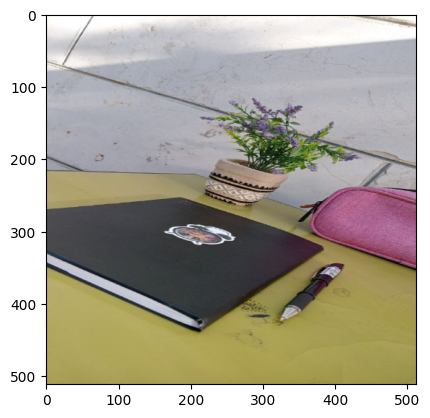

In [ ]:
# Convert the reseized image to RGB
rgb_image = cv2.cvtColor(resized_image , cv2.COLOR_BGR2RGB)

# show the rgb image
plt.imshow(rgb_image)


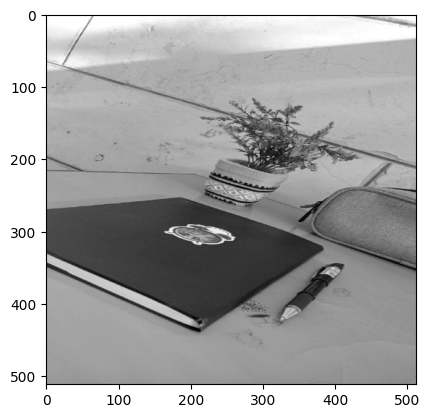

In [ ]:
# Convert the reseized image to grayscale
gray_image =  cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# show the reseized gray image
plt.imshow(gray_image, cmap='gray')

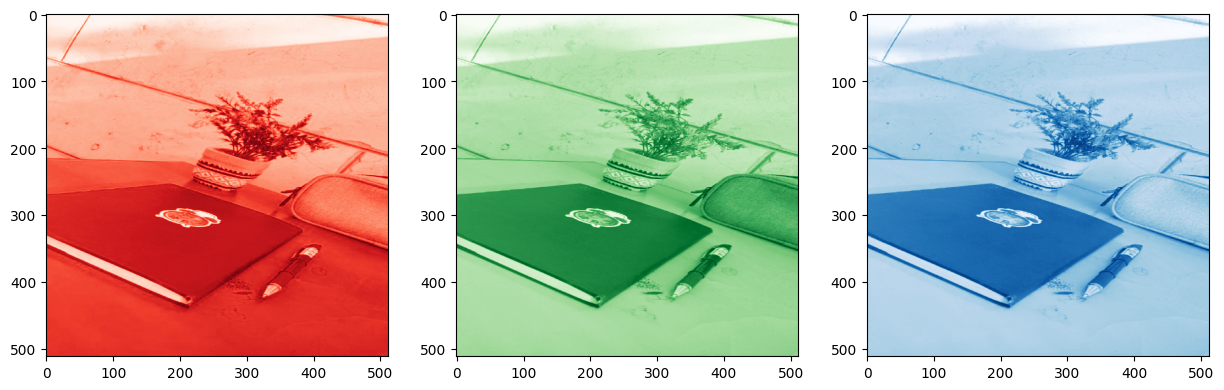

In [ ]:
# Split the reseized image into its three color channels
R, G, B = cv2.split(resized_image)
plt.figure(figsize = (15, 5))

# show the channels in one plot
plt.subplot(1, 3, 1)
plt.imshow(R, cmap = 'Reds_r')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap = 'Greens_r')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap = 'Blues_r')

## Convolutions

### Smoothing

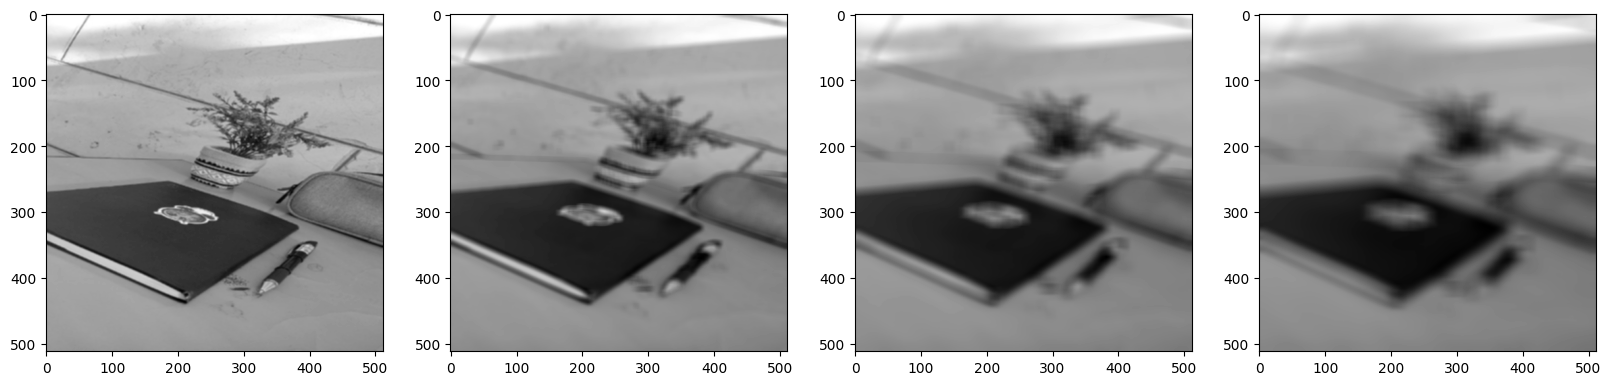

In [ ]:
# convole the image with Box mask of size 3, 9, 17, 25 and plot the four results in one plot

# Define mask sizes
mask_sizes = [3, 9, 17, 25]

# Create a figure for plotting
plt.figure(figsize=(20, 5))

for i, s in enumerate(mask_sizes, 1):
    # Create the mask
    mask = np.ones((s, s)) / (s**2)

    out_im = cv2.filter2D(gray_image, -1, mask)

    # Plot the result
    plt.subplot(1, 4, i)
    plt.imshow(out_im, cmap='gray')



<Figure size 2000x500 with 0 Axes>

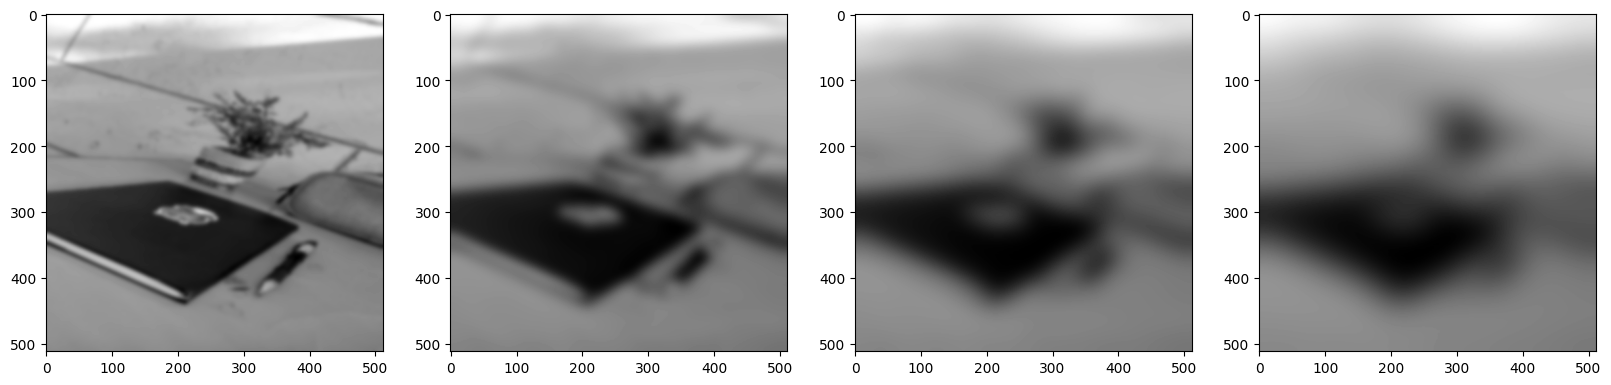

In [ ]:
# convole the image with Gaussian mask of Scale 3, 9, 17, 25 (choose suitable mask size) and plot the four results in one plot
plt.figure(figsize = (20, 5))


# Define parameters for Gaussian masks
params = [(21, 3), (55, 9), (103, 17), (151, 25)]

plt.figure(figsize=(20, 5))

for i, (sz, sc) in enumerate(params, 1):

    gaussian_im = cv2.GaussianBlur(gray_image, (sz, sz), sc)

    plt.subplot(1, 4, i)
    plt.imshow(gaussian_im, cmap='gray')



### Difference

Text(0.5, 1.0, 'All Edges')

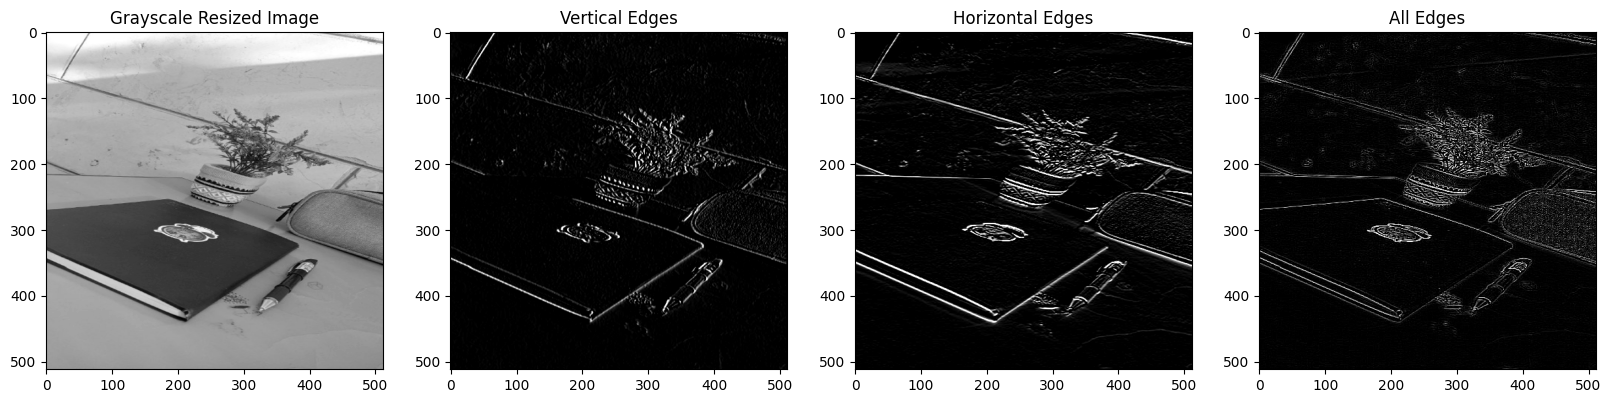

In [ ]:
# convole the image with horizontal mask to catch vertical edges
mask_v = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# convole the image with vertical mask to catch horizontal edges
mask_h = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

# convole the image with a Laplacian mask to catch all edges
mask_a   = np.array([[-1, -1, -1],
                     [-1,  8, -1],
                     [-1, -1, -1]])


# Convolve the image with the masks
edges_v = cv2.filter2D(gray_image, -1, mask_v)
edges_h = cv2.filter2D(gray_image, -1, mask_h)
edges_a = cv2.filter2D(gray_image, -1, mask_a)

# plot the three figures along with the gray scale resized image in one plot (4 images in total: grayscale, vertical edges, horizontal edges, and all edges)
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Resized Image')

plt.subplot(1, 4, 2)
plt.imshow(edges_v, cmap='gray')
plt.title('Vertical Edges')

plt.subplot(1, 4, 3)
plt.imshow(edges_h, cmap='gray')
plt.title('Horizontal Edges')

plt.subplot(1, 4, 4)
plt.imshow(edges_a, cmap='gray')
plt.title('All Edges')